# Effects of temperature on microbial carbon use efficiency

Danica Duan  
Emma Cavan, Tom Clegg, Samraat Pawar

## Introduction

## The Model
Adapted from [Emma Cavan](https://nbviewer.jupyter.org/github/e-cavan/Bacteria_Model/blob/master/Code/Consumer_Resource_Model.ipynb)'s model of the impact of chemical pollution on microbial communities. Originated from [Marsland et al. (2019)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006793) with [Tom Clegg](https://nbviewer.jupyter.org/github/CleggTom/Bacteria_EcoFunc/blob/master/notebooks/Metabolic_model.ipynb) making the first version.  

Further adapted to monitor microbial carbon use efficiency over time with different temperature. 

### Equations
#### General Model
Growth rate (biomass) of species i on resource j: 
\begin{equation}
dC_i/dt = C_i\Bigl(\sum_{j=1}^{M}U_{ij}s_j(1-\sum_{j=1}^{M}l_{jk}) - R_i\Bigl)
\end{equation}

Concentration dynamic of resource j:
\begin{equation}
dS_j/dt = \rho_j - \sum_{i=1}^{N}\Bigl(C_iU_{ij}s_j-\sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}\Bigl)
\end{equation}

Type 2: Monod equation
\begin{equation}
s_j = \frac{S_j}{K_j + S_j}
\end{equation}


| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $M$ | Number of resources | - | User defined |
| $N$ | Number of species | - | User defined |
| $C_i$ | Bacteria population of species i | g/mL | 0.1 |
| $S_j$ | Concentration of resource j | g/mL | 0.1 |
| $K_j$ | Half saturation constant | g/mL | 0.5? |
| $U_{ij}$ | Uptake of resource j by species i | - | Temperature & size dependant |
| $R_i$ | Respiration of species i | - | Temperature & size dependant |
| $l_{jk}$ | Leakage: proportion of resource j converted to resource k | - | 0.4? (Temperature-dependant?) |
| $\rho_j$ | Supply of resource j | g/mL | 1 |

#### Size and Temperature Dependency
\begin{equation}
U_{ij} = B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

\begin{equation}
R_i = B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $B$ | Normalisation constant | - | ? |
| $m$ | Mass | g | 1 |
| $Ea$ | Activation energy | eV | ? |
| $k$ | Boltsmann constant | eV/K | $8.62$ $\times 10^{-5}$ |
| T | Temperature | K | User defined |
| $T_{ref}$| Reference temperature | K | 273.15 |

With Schoolfield high temp deactivation: 
\begin{equation}
U_{ij} = \frac{B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + e^{\frac{E_{DU}}{k}\cdot(\frac{1}{T}-\frac{1}{T_{ref}})}}
\end{equation}

\begin{equation}
R_i = \frac{B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + e^{\frac{E_{DR}}{k}\cdot(\frac{1}{T}-\frac{1}{T_{ref}})}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $E_D$ | High temperature deactivation energy | eV | 3.5? (Should be different for U and R?) |

#### Carbon Use Efficiency
\begin{equation}
CUE_i = \frac{dC_i/dt}{\sum \limits _{j=1}^{M}U_{ij}s_j}
\end{equation}


## Simulation

- Extincted species are detected and replaced (concentration < 0.01 g/mL).
- Steady state is reached when no concentration change within 50 time steps. 
- CUE is calculated at each time step for each consumer. 

<ipython-input-10-a8824567afd9>:20: DeprecationWarning: scipy.full is deprecated and will be removed in SciPy 2.0.0, use numpy.full instead
  x0 = np.concatenate((sc.full([N], (0.1)),sc.full([M], (0.1)))) # Starting concentration for resources and consumers


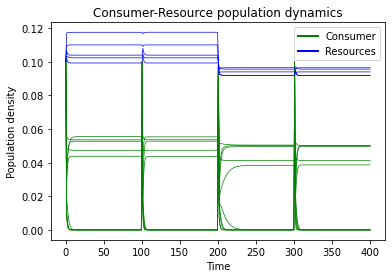

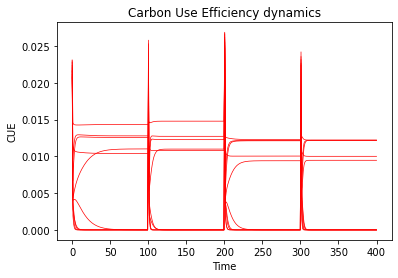

In [10]:
from Bacteria_vector_modular import ass_temp_run, plot_run
from CUE import CUE_cal, plot_CUE
import numpy as np
import scipy as sc

########## Setting Parameters ###########
N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 22 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((sc.full([N], (0.1)),sc.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)


########## Running Model ###########
# Consumer-Resource dynamics
result_array = ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ)[0]
plot_run(result_array)
# print(result_array)

# CUE dynamics
CUE_out = CUE_cal(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ)
plot_CUE(CUE_out)
# print(CUE_out)